# Figures

This notebook was used to generated the figures in the paper.

# Alignment vs Uniformity

Here we generate the alignment and uniformity plot in the paper.

In [16]:
%pip install matplotlib pandas numpy


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
from __future__ import annotations

import warnings

warnings.filterwarnings("ignore")

from typing import NamedTuple

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from matplotlib import cm

FORMAT = "pdf"

In [18]:
class Result(NamedTuple):
    name: str
    avg_sts: float
    alignment: float
    uniformity: float
    pos: tuple[float, float] = (1, 1)

    @property
    def full_name(self):
        return f"{self.name} ({self.avg_sts})"

    @property
    def coords(self):
        return (self.uniformity, self.alignment)

    @property
    def text_coords(self):
        return (self.pos[0] * 10, self.pos[1] * 10)


results = [
    Result("Sup. SimCSE$^+$", avg_sts=81.6, alignment=0.24, uniformity=-3.7, pos=(-2, 2)),
    Result("Unsup. SimCSE", avg_sts=76.25, alignment=0.22, uniformity=-2.65, pos=(-1, 1.5)),
    Result("Avg. BERT", avg_sts=56.7, alignment=0.19, uniformity=-1.55, pos=(-1, 1)),
    Result("SBERT$^+$", avg_sts=74.9, alignment=0.185, uniformity=-3.0, pos=(-7, -3)),
    Result("SBERT-flow$^+$", avg_sts=76.6, alignment=0.44, uniformity=-3.7),
    Result("SBERT-whitening$^+$", avg_sts=77.0, alignment=0.5, uniformity=-3.9),
    Result("BERT-flow", avg_sts=66.6, alignment=0.56, uniformity=-3.72),
    Result("BERT-whitening", avg_sts=66.3, alignment=0.64, uniformity=-3.87),
    Result("$\mathbf{ADD}$", avg_sts=77.25, alignment=0.1903, uniformity=-2.4395, pos=(1, -2)),
]

c = [r.avg_sts for r in results]
s = [150] * len(results)

df = pd.DataFrame(
    {
        "x": np.asarray([r.uniformity for r in results]),
        "y": np.asarray([r.alignment for r in results]),
    },
    index=[r.full_name for r in results],
)

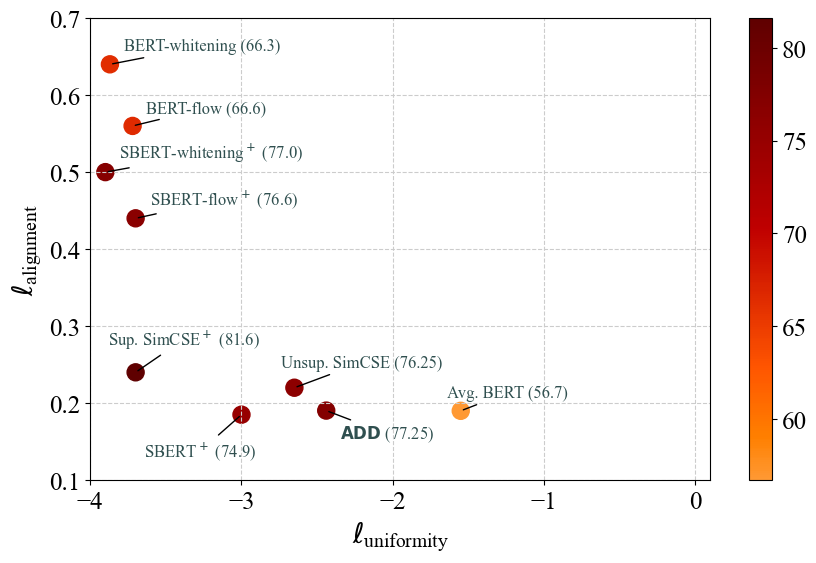

In [19]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap


plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["font.cursive"] = ["Times New Roman"] + plt.rcParams["font.cursive"]

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
df.plot("x", "y", kind="scatter", ax=ax)
cmap = cm.get_cmap("gist_heat_r")
cmap = truncate_colormap(cmap, 0.2, 0.75)

plt.grid()
ax.grid(which="major", color="#CCCCCC", linestyle="--")
ax.grid(which="minor", color="#CCCCCC", linestyle=":")
sct = ax.scatter(df["x"], df["y"], c=c, cmap=cmap, s=s)


font = dict(fontname="Times New Roman", color="darkslategrey")

plt.xlim([-4, 0.1])
plt.ylim([0.1, 0.7])


cb = plt.colorbar(sct)

for res in results:
    ax.annotate(
        res.full_name,
        res.coords,
        xytext=res.text_coords,
        textcoords="offset points",
        fontsize=12,
        color="darkslategrey",
        arrowprops=dict(arrowstyle="-"),
    )
plt.ylabel(r"$\ell_{\mathdefault{alignment}}$", fontsize=20)
plt.xlabel(r"$\ell_{\mathdefault{uniformity}}$", fontsize=20)
plt.savefig(
    f"figures/alignment_vs_uniformity.{FORMAT}",
    dpi=300 if FORMAT == "pdf" else 600,
    bbox_inches="tight",
)


# Hyperparameter settings

Visualize the different hyperparameter settings for t and k.

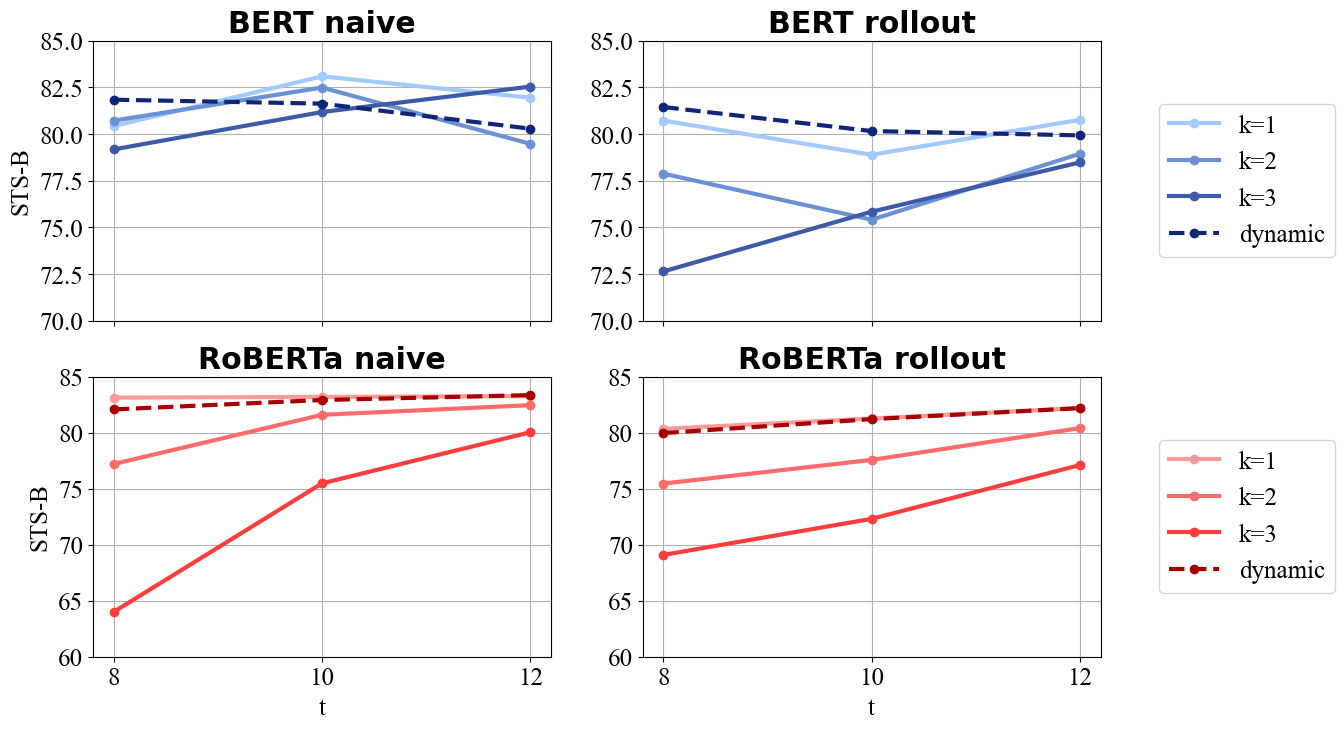

In [20]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["font.cursive"] = ["Times New Roman"] + plt.rcParams["font.cursive"]


values = {
    ("BERT", 1, 8): (80.43, 80.72),
    ("BERT", 1, 10): (83.09, 78.89),
    ("BERT", 1, 12): (81.95, 80.76),
    ("BERT", 2, 8): (80.72, 77.88),
    ("BERT", 2, 10): (82.49, 75.41),
    ("BERT", 2, 12): (79.48, 78.94),
    ("BERT", 3, 8): (79.18, 72.64),
    ("BERT", 3, 10): (81.18, 75.84),
    ("BERT", 3, 12): (82.54, 78.48),
    ("BERT", "D", 8): (81.84, 81.45),
    ("BERT", "D", 10): (81.63, 80.16),
    ("BERT", "D", 12): (80.29, 79.93),
    ("RoBERTa", 1, 8): (83.13, 80.35),
    ("RoBERTa", 1, 10): (83.20, 81.27),
    ("RoBERTa", 1, 12): (83.27, 82.20),
    ("RoBERTa", 2, 8): (77.21, 75.46),
    ("RoBERTa", 2, 10): (81.60, 77.57),
    ("RoBERTa", 2, 12): (82.46, 80.41),
    ("RoBERTa", 3, 8): (64.01, 69.09),
    ("RoBERTa", 3, 10): (75.48, 72.31),
    ("RoBERTa", 3, 12): (80.04, 77.11),
    ("RoBERTa", "D", 8): (82.08, 79.97),
    ("RoBERTa", "D", 10): (82.92, 81.21),
    ("RoBERTa", "D", 12): (83.36, 82.20),
}

line_colors = {
    "BERT": ["#a1cbff", "#6a91d4", "#3c5aa7", "#0f2578"],
    "RoBERTa": ["#ff9a9a", "#ff6b6b", "#ff3d3d", "#a70000"],
}

# Create figure with 2 grids
fig, axs = plt.subplots(2, 2, figsize=(13, 8), sharex=True, sharey=False)

for ix, model in enumerate(["BERT", "RoBERTa"]):
    k = [k[1] for k in values.keys() if k[0] == model]
    t = [k[2] for k in values.keys() if k[0] == model]
    naive = [v[0] for k, v in values.items() if k[0] == model]
    rollout = [v[1] for k, v in values.items() if k[0] == model]

    for i, color in zip(set(k), line_colors[model]):
        idx = [j for j, x in enumerate(k) if x == i]
        axs[ix, 0].plot(
            t[min(idx) : max(idx) + 1],
            naive[min(idx) : max(idx) + 1],
            label=f"k={i}" if i != "D" else "dynamic",
            color=color,
            linewidth=3,
            linestyle="-" if i != "D" else "--",
            marker="o",
        )
        axs[ix, 1].plot(
            t[min(idx) : max(idx) + 1],
            rollout[min(idx) : max(idx) + 1],
            label=f"k={i}" if i != "D" else "dynamic",
            color=color,
            linewidth=3,
            linestyle="-" if i != "D" else "--",
            marker="o",
        )

    for iy, agg in enumerate(["naive", "rollout"]):
        axs[ix, iy].set_xticks([8, 10, 12])
        axs[ix, iy].set_ylim(min(naive + rollout) - 1, max(naive + rollout) + 1)
        axs[ix, iy].set_title(f"{model} {agg}", fontweight="bold", fontname="DejaVu Sans")
        axs[ix, iy].grid(True)
        # axs[ix, iy].legend()

    box = axs[ix, 0].get_position()
    axs[ix, 0].set_position([box.x0, box.y0, box.width * 1, box.height])

    box = axs[ix, 1].get_position()
    axs[ix, 1].set_position([box.x0, box.y0, box.width * 1, box.height])

    # Move legend to right side
    axs[ix, 1].legend(loc="center left", bbox_to_anchor=(1.1, 0.5))

axs[1, 0].set_xlabel("t")
axs[1, 1].set_xlabel("t")
axs[0, 0].set_ylabel("STS-B")
axs[1, 0].set_ylabel("STS-B")
axs[0, 0].set_yticks([70, 72.5, 75, 77.5, 80, 82.5, 85])
axs[0, 1].set_yticks([70, 72.5, 75, 77.5, 80, 82.5, 85])
axs[1, 0].set_yticks(range(60, 90, 5))
axs[1, 1].set_yticks(range(60, 90, 5))

plt.savefig(
    f"figures/static_vs_dynamic_all_2x2.{FORMAT}",
    dpi=300 if FORMAT == "pdf" else 600,
    bbox_inches="tight",
)


2x2 Grid

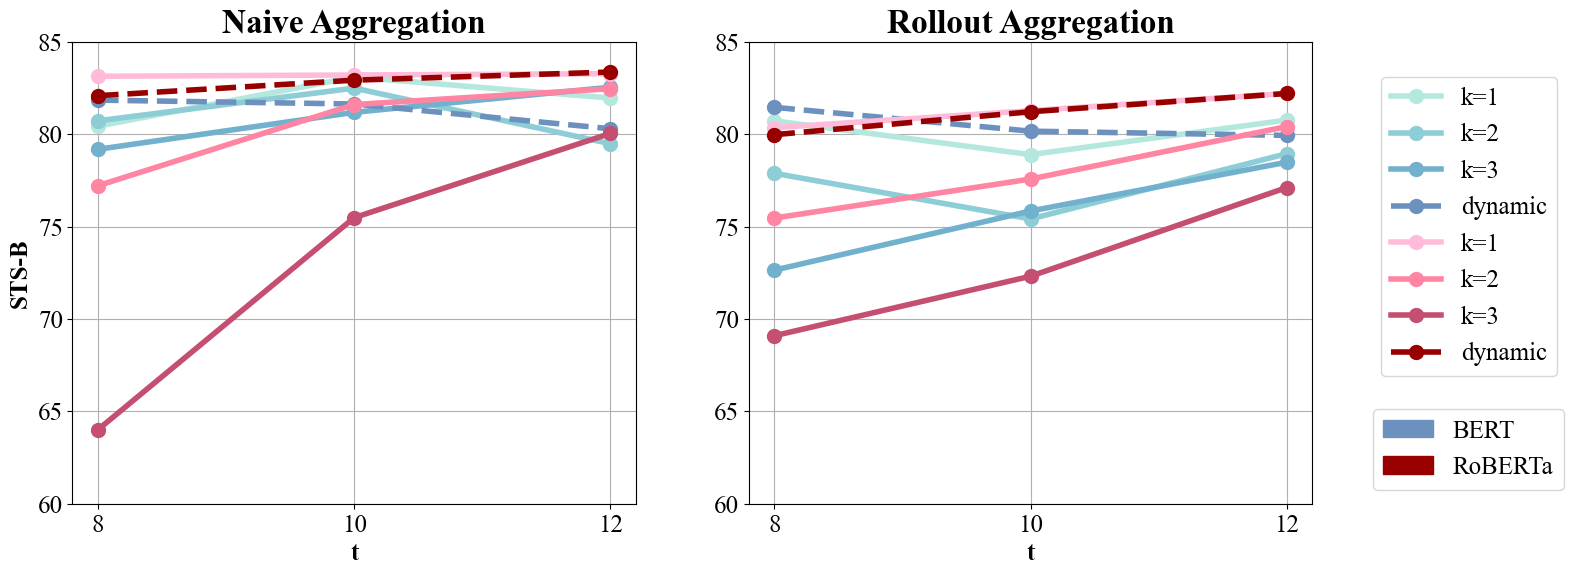

In [21]:
plt.rcParams.update({"font.size": 18})

line_colors = {
    "BERT": ["#b4e8de", "#8ccdd6", "#72b1ce", "#6d91bf"],
    "RoBERTa": ["#ffbcda", "#ff85a3", "#c44f70", "#980000"],
}

# Create figure with 2 grids
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=False)

for ix, model in enumerate(["BERT", "RoBERTa"]):
    k = [k[1] for k in values.keys() if k[0] == model]
    t = [k[2] for k in values.keys() if k[0] == model]
    naive = [v[0] for k, v in values.items() if k[0] == model]
    rollout = [v[1] for k, v in values.items() if k[0] == model]

    for i, color in zip(set(k), line_colors[model]):
        idx = [j for j, x in enumerate(k) if x == i]
        axs[0].plot(
            t[min(idx) : max(idx) + 1],
            naive[min(idx) : max(idx) + 1],
            label=f"k={i}" if i != "D" else "dynamic",
            color=color,
            linewidth=4,
            linestyle="-" if i != "D" else "--",
            marker="o",
            markersize=10,
        )
        axs[1].plot(
            t[min(idx) : max(idx) + 1],
            rollout[min(idx) : max(idx) + 1],
            label=f"k={i}" if i != "D" else "dynamic",
            color=color,
            linewidth=4,
            linestyle="-" if i != "D" else "--",
            marker="o",
            markersize=10,
        )

    for iy, agg in enumerate(["naive", "rollout"]):
        axs[iy].set_xticks([8, 10, 12])
        axs[iy].set_xticklabels([8, 10, 12], fontsize=18)  # Customize x-tick labels
        axs[iy].set_ylim(min(naive + rollout) - 1, max(naive + rollout) + 1)
        # axs[iy].set_yticklabels(fontsize=18)  # Customize x-tick labels
        axs[iy].set_title(f"{agg.title()} Aggregation", fontweight="bold", fontsize=24)
        axs[iy].grid(True)
        # axs[ix, iy].legend()

    box = axs[0].get_position()
    axs[0].set_position([box.x0, box.y0, box.width * 1, box.height])

    box = axs[1].get_position()
    axs[1].set_position([box.x0, box.y0, box.width * 1, box.height])

    # Move legend to right side
    axs[1].legend(loc="center left", bbox_to_anchor=(1.1, 0.6), fontsize=18)

    # Add color legend
bert_patch = mpatches.Patch(color="#6d91bf", label="BERT")
roberta_patch = mpatches.Patch(color="#980000", label="RoBERTa")
fig.legend(
    handles=[bert_patch, roberta_patch],
    loc="center left",
    bbox_to_anchor=(0.93, 0.2),
    ncol=1,
    fontsize=18,
)


axs[0].set_xlabel("t", fontweight="bold")
axs[1].set_xlabel("t", fontweight="bold")
axs[0].set_ylabel("STS-B", fontweight="bold")

axs[0].set_yticks([70, 72.5, 75, 77.5, 80, 82.5, 85])
axs[1].set_yticks([70, 72.5, 75, 77.5, 80, 82.5, 85])
axs[0].set_yticks(range(60, 90, 5))
axs[1].set_yticks(range(60, 90, 5))

plt.savefig(
    f"figures/static_vs_dynamic_all_1x2.{FORMAT}",
    dpi=300 if FORMAT == "pdf" else 600,
    bbox_inches="tight",
)

# Attention Heatmaps

Show the normalized attentions scores for each token in the example sentences.

In [22]:
sequences = [
    ["we", "should", "go", "to", "the", "small", "italian", "restaurant", "again"],
    ["two", "big", "dogs", "are", "running", "fast", "in", "the", "park"],
    ["mary", "helped", "john", "to", "style", "his", "new", "apartment"],
    ["a", "brown", "bear", "is", "eating", "a", "small", "fish"],
]

attentions_normalized = [
    np.asarray(
        [
            (0.3357, 0.3805, 0.3374, 0.3099, 0.3088, 0.2943, 0.2841, 0.3774, 0.3571),
            (0.2978, 0.2978, 0.2935, 0.3764, 0.4518, 0.2839, 0.3042, 0.3401, 0.3191),
        ]
    ).T,
    np.asarray(
        [
            (0.3446, 0.2429, 0.4220, 0.4230, 0.3123, 0.3145, 0.2896, 0.2709, 0.3339),
            (0.3032, 0.2690, 0.3280, 0.3395, 0.2981, 0.3489, 0.3704, 0.4146, 0.3052),
        ]
    ).T,
    np.asarray(
        [
            (0.3361, 0.5068, 0.3114, 0.2805, 0.4143, 0.3020, 0.2636, 0.3496, float("nan")),
            (0.3003, 0.3692, 0.2998, 0.4274, 0.3462, 0.3419, 0.3079, 0.4116, float("nan")),
        ]
    ).T,
    np.asarray(
        [
            (0.4419, 0.2447, 0.3890, 0.4437, 0.3874, 0.3051, 0.2389, 0.3106),
            (0.4383, 0.2924, 0.2963, 0.3486, 0.3283, 0.4219, 0.3108, 0.3614),
        ]
    ).T,
]

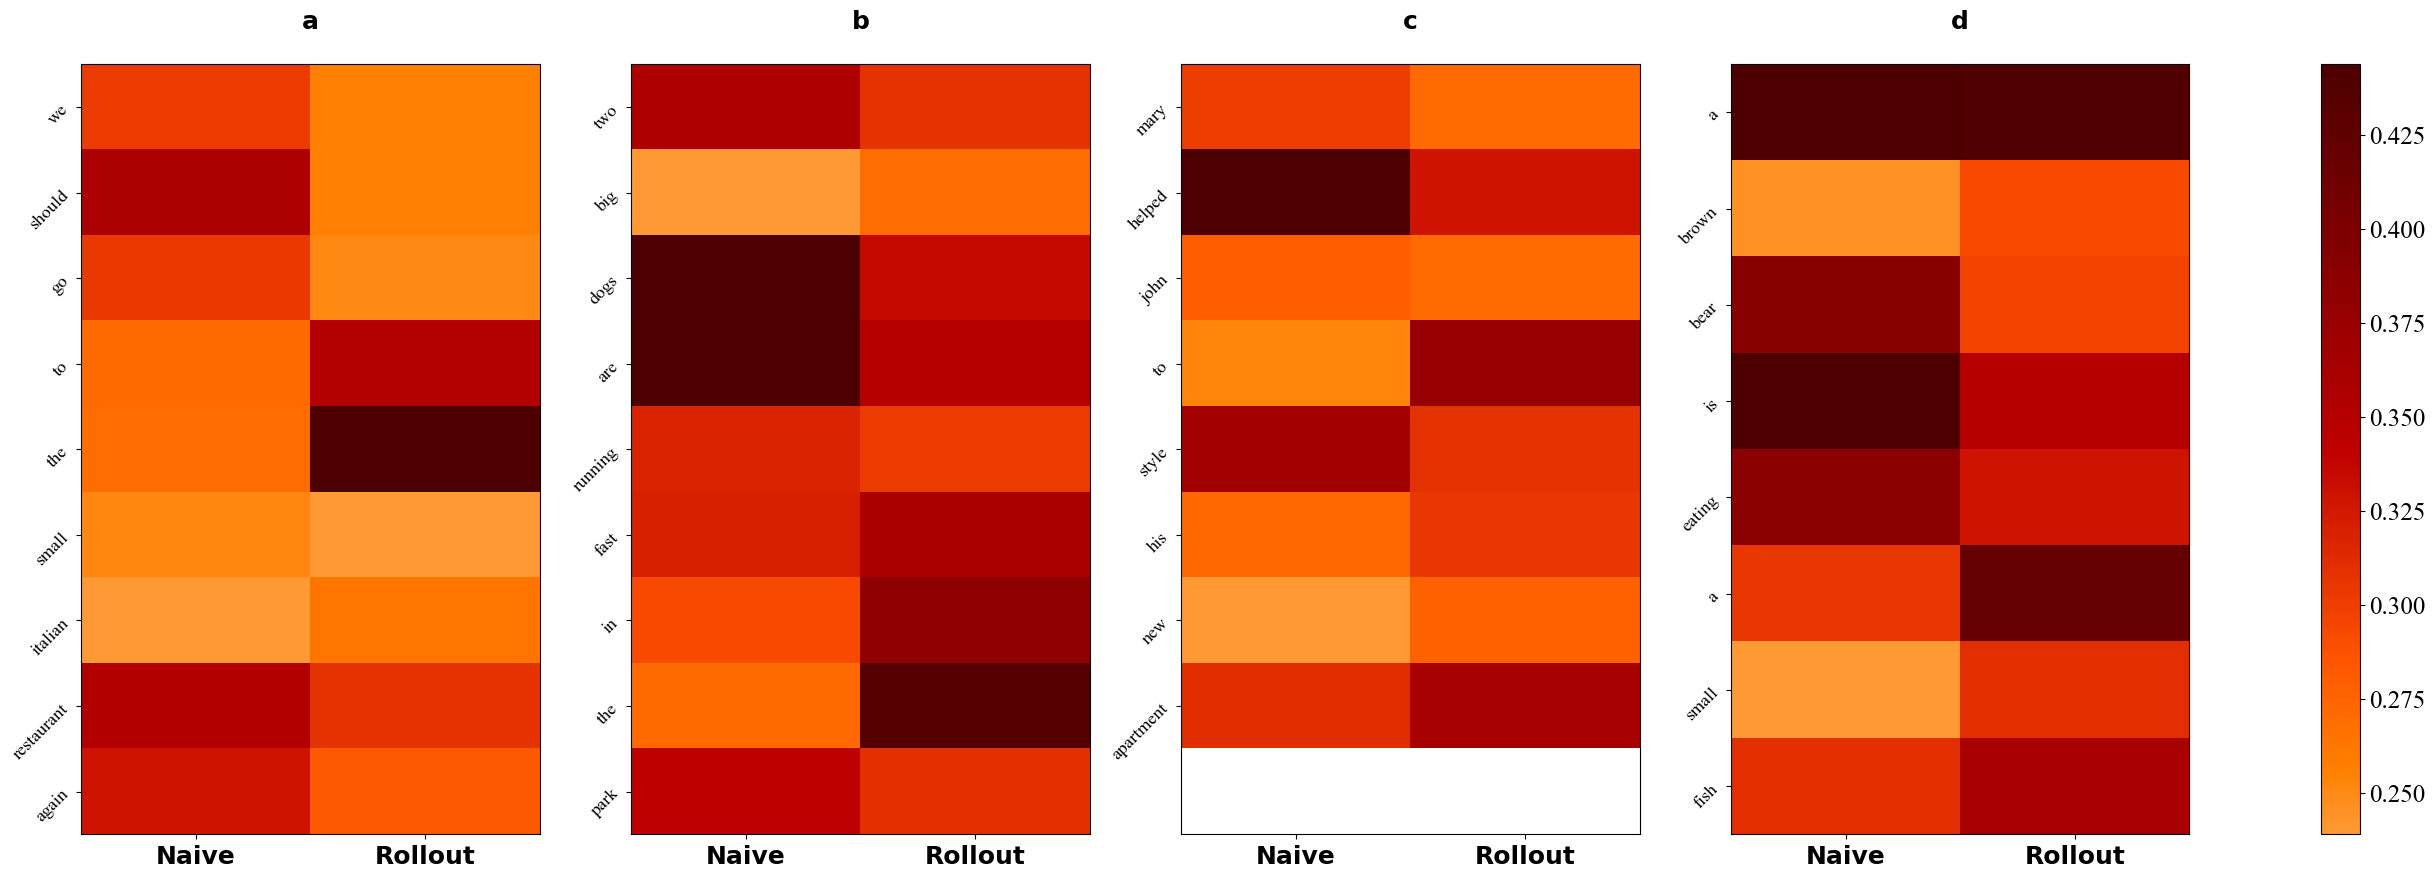

In [23]:
from string import ascii_lowercase

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["font.cursive"] = ["Times New Roman"] + plt.rcParams["font.cursive"]


fig, axs = plt.subplots(1, len(sequences), figsize=(34, 10))

cmap = cm.get_cmap("gist_heat_r")
cmap = truncate_colormap(cmap, 0.2, 0.8)

for i in range(len(sequences)):
    ax = axs[i]
    img = ax.imshow(attentions_normalized[i], cmap=cmap, interpolation="nearest", aspect="auto")
    ax.set_yticklabels(sequences[i], rotation=45, fontsize=13)
    ax.set_yticks(range(len(sequences[i])))

    ax.set_xticklabels(["Naive", "Rollout"], weight="bold", fontname="DejaVu Sans", fontsize=18)
    ax.set_xticks(range(2))
    ax.set_title(f"{ascii_lowercase[i]}\n", fontweight="bold", fontname="DejaVu Sans", fontsize=18)

fig.colorbar(img, ax=axs.ravel().tolist())


plt.savefig(
    f"figures/scores_heatmap.{FORMAT}",
    dpi=300 if FORMAT == "pdf" else 600,
    bbox_inches="tight",
)

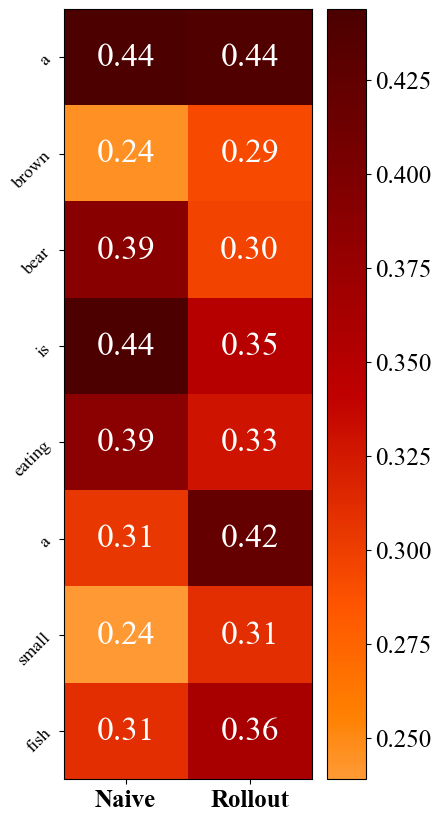

In [25]:
from string import ascii_lowercase

sequences = [sequences[-1]]
attentions_normalized = [attentions_normalized[-1]]

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["font.cursive"] = ["Times New Roman"] + plt.rcParams["font.cursive"]


fig, axs = plt.subplots(1, len(sequences), figsize=(4, 10))

cmap = cm.get_cmap("gist_heat_r")
cmap = truncate_colormap(cmap, 0.2, 0.8)

for i in range(len(sequences)):
    ax = axs[i] if len(sequences) > 1 else axs
    img = ax.imshow(attentions_normalized[i], cmap=cmap, interpolation="nearest", aspect="auto")

    # Adding the text (value) to each cell in white color
    for (y, x), value in np.ndenumerate(attentions_normalized[i]):
        ax.text(x, y, f"{value:.2f}", ha="center", va="center", color="white", fontsize=24)

    ax.set_yticklabels(sequences[i], rotation=45, fontsize=13)
    ax.set_yticks(range(len(sequences[i])))

    ax.set_xticklabels(["Naive", "Rollout"], weight="bold", fontsize=18)
    ax.set_xticks(range(2))

fig.colorbar(img, ax=axs.ravel().tolist() if len(sequences) > 1 else axs)


plt.savefig(
    f"figures/scores_heatmap_single.{FORMAT}",
    dpi=300 if FORMAT == "pdf" else 600,
    bbox_inches="tight",
)